# Dice Throw Visualization



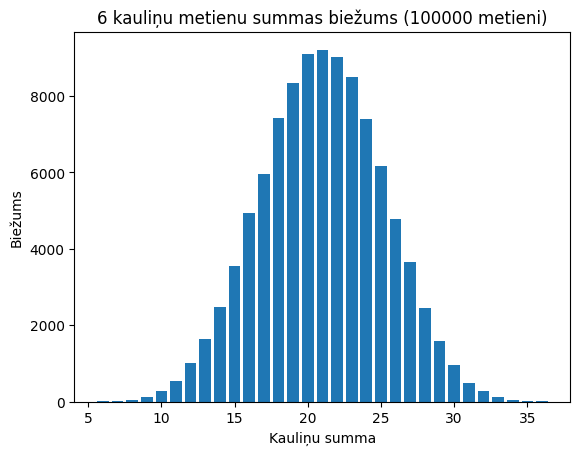

In [15]:
ROLL_COUNT = 1_000_000
DICE_COUNT = 6
DICE_MIN = 1
DICE_MAX = 6
SEED = 2024

import random
if SEED is not None: # for specific pseudo-random sequence
    random.seed(SEED)
from collections import Counter
import matplotlib.pyplot as plt  # requires pip install matplotlib once

def throw_single_die(dice_min=1, dice_max=6):
    return random.randint(dice_min, dice_max)

# Funkcija, kas ģenerē 6 kauliņu metienu summu
def roll_dice(dice_count=6, dice_min=1, dice_max=6):
    return sum(throw_single_die(dice_min, dice_max) for _ in range(dice_count))
 
# Ģenerēsim 100 garu sarakstu ar 6 kauliņu summām
# rolls = [roll_dice(DICE_COUNT, DICE_MIN, DICE_MAX) for _ in range(ROLL_COUNT)]
 
# # Saskaitām biežumu, izmantojot Counter
# rolls_count = Counter(rolls)
 
# # Sagatavojam datus diagrammai
# sums = list(rolls_count.keys())
# frequencies = list(rolls_count.values())
 
# # Zīmējam stabiņu diagrammu
# plt.bar(sums, frequencies)
# plt.xlabel('Kauliņu summa')
# plt.ylabel('Biežums')
# plt.title('6 kauliņu metienu summas biežums (100 metieni)')
# plt.show()

# let's make a function that takes a list of dice rolls and creates a visual histogram
# additional parameters is how many dice we have and what is the minimum and maximum value of a die
def plot_histogram(roll_count=100_000, 
                   dice_count=6, 
                   dice_min=1, 
                   dice_max=6,
                   csv_save_path=None,
                   png_save_path=None,
                   show_plot=True):
    rolls = [roll_dice(dice_count, dice_min, dice_max) for _ in range(roll_count)]
    rolls_count = Counter(rolls)
    sums = list(rolls_count.keys())
    frequencies = list(rolls_count.values())
    plt.bar(sums, frequencies)
    plt.xlabel('Kauliņu summa')
    plt.ylabel('Biežums')
    plt.title(f'{dice_count} kauliņu metienu summas biežums ({len(rolls)} metieni)')

    # this part should be refactored to a separate function
    if csv_save_path is not None:
        import csv  # this example uses csv built-in module, we could have done it with pandas as well or with writer
        with open(csv_save_path, 'w', newline='') as csvfile:
            csvwriter = csv.writer(csvfile)
            csvwriter.writerow(['sum', 'frequency'])
            # for sum_, frequency in zip(sums, frequencies): # works but we want them sorted
            for sum_, frequency in sorted(rolls_count.items()):
                csvwriter.writerow([sum_, frequency])

    if png_save_path is not None:
        plt.savefig(png_save_path)

    if show_plot:
        plt.show()
    
    # let's return rolls_count for later use
    return rolls_count
# let's call the default function 
plot_histogram()

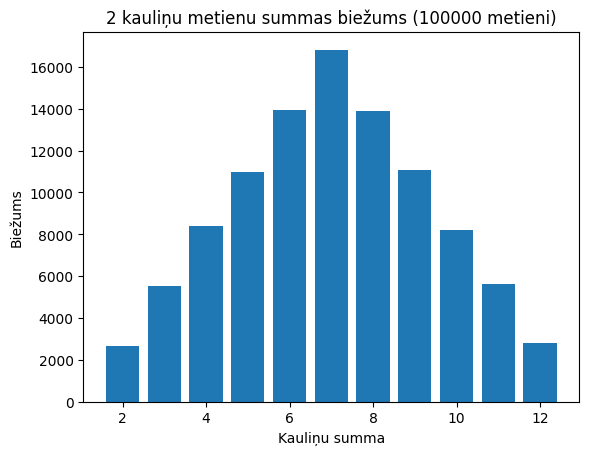

In [16]:
# let's throws 2 dice 100_000 times and save to csv
plot_histogram(dice_count=2, csv_save_path='dice_2.csv')

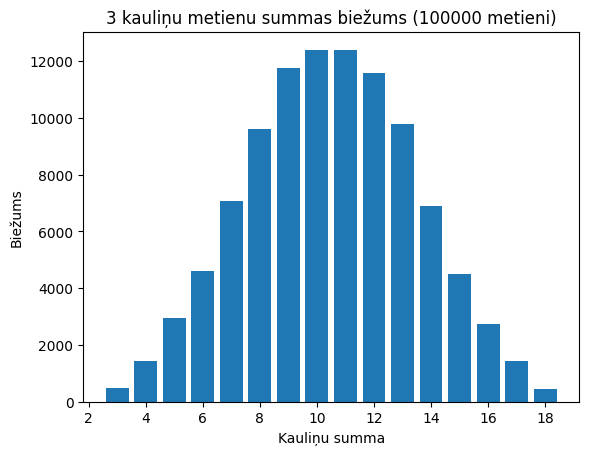

In [17]:
# let's throw 3 dice 100_000 times and save to csv
plot_histogram(dice_count=3, csv_save_path='dice_3.csv')

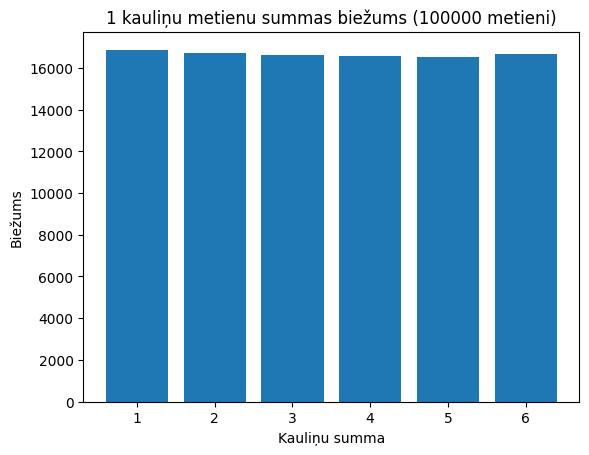

In [18]:
# let's throw single dice 100_000 times and save to csv
plot_histogram(dice_count=1, csv_save_path='dice_1.csv')

In [4]:
# let's print the results of the simulation
# let's print in order from smallest throw to largest
for summa, biezums in sorted(rolls_count.items()):
    print(f"{summa}: {biezums}")

6: 13
7: 128
8: 437
9: 1198
10: 2642
11: 5442
12: 9758
13: 16145
14: 24981
15: 35358
16: 47967
17: 61232
18: 73554
19: 83881
20: 90442
21: 92943
22: 90509
23: 84200
24: 73147
25: 61027
26: 48362
27: 35881
28: 24993
29: 16074
30: 9742
31: 5471
32: 2684
33: 1145
34: 473
35: 159
36: 12


In [6]:
print(rolls_count.items())
# by default items() will be list of tuples

dict_items([(20, 90442), (9, 1198), (17, 61232), (25, 61027), (18, 73554), (15, 35358), (23, 84200), (16, 47967), (19, 83881), (24, 73147), (26, 48362), (22, 90509), (27, 35881), (28, 24993), (30, 9742), (31, 5471), (11, 5442), (21, 92943), (14, 24981), (12, 9758), (29, 16074), (32, 2684), (13, 16145), (8, 437), (33, 1145), (10, 2642), (6, 13), (34, 473), (7, 128), (35, 159), (36, 12)])


In [8]:
# let's save the results in a csv file
# CSV file is just a text file where values are separated by commas
# our column headers will be "summa" and "biežums"
# each row will contain one summa and one biežums
file_name = "dice_rolls.csv"
with open(file_name, "w", encoding="utf-8") as file_stream:
    # first we write the column headers
    file_stream.write("summa,biezums\n")
    for summa, biezums in sorted(rolls_count.items()): 
        # when sorting list of tuples, it will sort by first element of tuple by default
        file_stream.write(f"{summa},{biezums}\n") # note no spaces between values, only commas
        # instead of file.write I could have used print function with file parameter
        # print(f"{summa},{biezums}", file=file_stream)
        # print is a bit slower than file.write, but it is more convenient
        # of course file should be open in write mode and encoding should be specified
# file_stream is automatically closed when we exit the with block

# we have other options to write csv files
# we could have used csvwriter from csv module - which is built-in
# also a popular library called pandas has a function to write csv files